In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# REQUIREMENTS

 Load the csv file and show top 5 records from it

In [165]:
fifa_df = pd.read_csv("players_20.csv")
fifa_df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


How you would be able to see each column's name

In [166]:
fifa_df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

 Show the number of rows and columns in the dataset

In [167]:
print("Rows: " + str(len(fifa_df.index)))
print("Columns: " + str(len(fifa_df.columns)))


Rows: 18278
Columns: 104


 Show the number of players in each country

In [168]:
countrynames = fifa_df.groupby('nationality')

names = countrynames.groups.keys()

countries = []

for name in names:
    countries.append([ name, len(countrynames.get_group(name)) ])

countries = pd.DataFrame(countries, columns=("Country", "Players"))
countries

,Country,Players
0,Afghanistan,2
1,Albania,43
2,Algeria,50
3,Angola,16
4,Antigua & Barbuda,7
...,...,...
157,Venezuela,66
158,Vietnam,1
159,Wales,117
160,Zambia,10


 Show the top 10 countries with the highest amount of players

In [169]:
countries = countries.sort_values(by='Players', axis=0, ascending=False)

countries.head(10)

,Country,Players
45,England,1667
57,Germany,1216
136,Spain,1035
53,France,984
5,Argentina,886
18,Brazil,824
77,Italy,732
30,Colombia,591
80,Japan,453
108,Netherlands,416


Create a bar plot of the top 5 countries with the highest number of players, and fill the bars in green

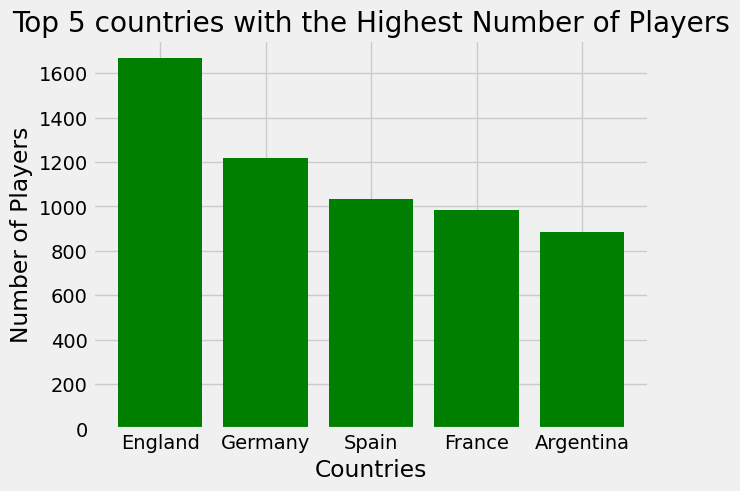

In [170]:
topfive = countries.head(5)

plt.bar(np.arange(len(topfive['Country'])), topfive['Players'], color='green')
plt.xticks(np.arange(len(topfive['Country'])), topfive['Country'])
plt.xlabel("Countries")
plt.ylabel("Number of Players")
plt.title("Top 5 countries with the Highest Number of Players")

plt.show()

Display the short name and wages for the top 5 players

In [171]:
players = fifa_df.sort_values(by='potential', axis=0, ascending=False)
players = players.loc[:, ['short_name', 'wage_eur']]
players.head(5)

,short_name,wage_eur
10,K. Mbappé,155000
0,L. Messi,565000
6,M. ter Stegen,250000
73,M. de Ligt,76000
1,Cristiano Ronaldo,405000


Display the short name and wages for the top 5 players with the highest salaries

In [172]:
players2 = fifa_df.sort_values(by='wage_eur', axis=0, ascending=False)
players2 = players2.loc[:, ['short_name', 'wage_eur']]
players2.head(5)

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


Create a bar plot of the previous bullet point

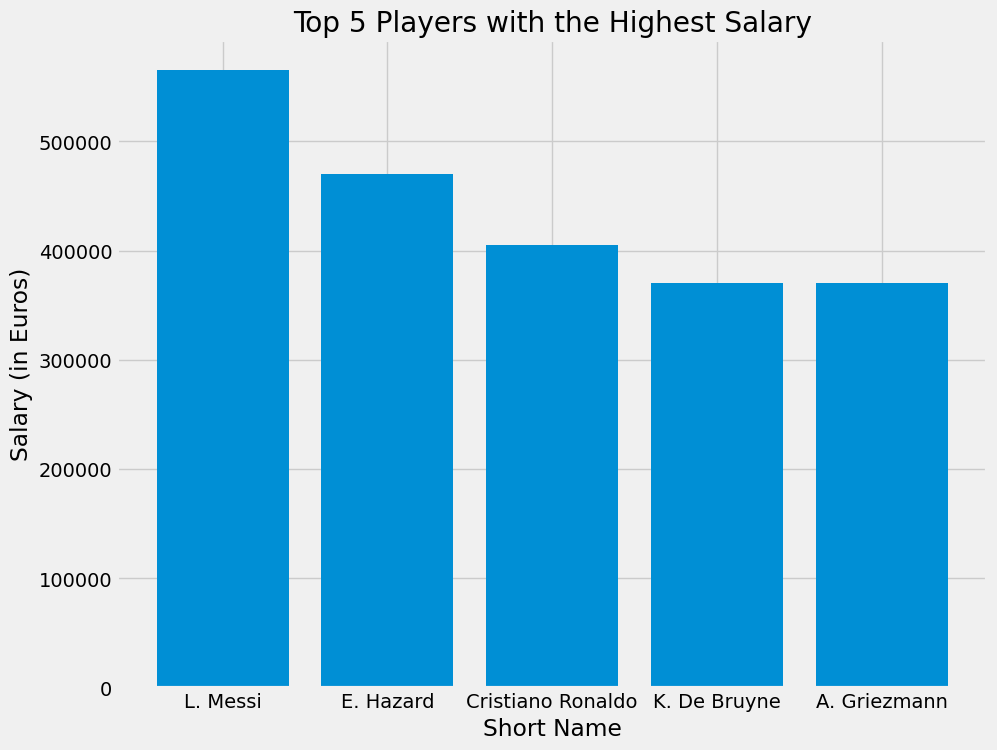

In [173]:
topfive = players2.head(5)

plt.figure(figsize = (10,8))
plt.bar(np.arange(len(topfive['short_name'])), topfive['wage_eur'])
plt.xticks(np.arange(len(topfive['short_name'])), topfive['short_name'])
plt.xlabel("Short Name")
plt.ylabel("Salary (in Euros)")
plt.title("Top 5 Players with the Highest Salary")

plt.show()

Show top 10 records for Germany

In [174]:
germanplayers = fifa_df.loc[fifa_df['nationality'] == "Germany"]
german = germanplayers.sort_values(by='potential', axis=0, ascending=False)
german.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
109,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
165,213331,https://sofifa.com/player/213331/jonathan-tah/...,J. Tah,Jonathan Tah,23,1996-02-11,195,97,Germany,Bayer 04 Leverkusen,...,70+2,76+2,76+2,76+2,70+2,73+2,81+2,81+2,81+2,73+2
118,212194,https://sofifa.com/player/212194/julian-brandt...,J. Brandt,Julian Brandt,23,1996-05-02,185,83,Germany,Borussia Dortmund,...,64+2,63+2,63+2,63+2,64+2,60+2,51+2,51+2,51+2,60+2
117,209658,https://sofifa.com/player/209658/leon-goretzka...,L. Goretzka,Leon Goretzka,24,1995-02-06,189,79,Germany,FC Bayern München,...,79+3,79+3,79+3,79+3,79+3,78+3,76+3,76+3,76+3,78+3
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3


Show the top 5 records of Germany players who have a maximum height, weight, and wage

In [175]:
german2 = germanplayers.sort_values(by=['weight_kg','height_cm','wage_eur' ], axis=0, ascending=False)
german2.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2


 Display the short name and wages of the top 5 Germany players

In [176]:
german3 = germanplayers.sort_values(by='potential', axis=0, ascending=False)
german3 = german3.loc[:, ['short_name', 'wage_eur']]
german3.head(5)

,short_name,wage_eur
6,M. ter Stegen,250000
55,L. Sané,195000
109,K. Havertz,70000
77,N. Süle,115000
165,J. Tah,67000


Show top 5 players who have the best shooting skills among all the players with short names

In [177]:
snames = fifa_df.dropna(subset=['short_name'])
snames = snames.sort_values(by='shooting', axis=0, ascending=False)
snames.head(5)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
12,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,...,65+3,66+3,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3
17,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,1988-06-02,173,70,Argentina,Manchester City,...,60+3,58+3,58+3,58+3,60+3,56+3,50+3,50+3,50+3,56+3
205,159261,https://sofifa.com/player/159261/fabio-quaglia...,F. Quagliarella,Fabio Quagliarella,36,1983-01-31,180,79,Italy,Sampdoria,...,54+2,54+2,54+2,54+2,54+2,50+2,45+2,45+2,45+2,50+2


Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills

In [178]:
defend = fifa_df.sort_values(by='defending', axis=0, ascending=False)
defend = defend.loc[:, ['short_name', 'defending', 'nationality', 'club']]
defend.head(5)

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


Show wage records of the top 5 players of the 'Real Madrid' team

In [179]:
realmadrid = fifa_df.loc[fifa_df['club'] == "Real Madrid"]
realmadrid = realmadrid.sort_values(by='potential', axis=0, ascending=False)
realmadrid1 = realmadrid.loc[:, ['wage_eur']]
realmadrid1.head(5)

,wage_eur
568,60000
4,470000
76,205000
8,340000
161,155000


Show shooting records of top 5 players of 'Real Madrid' team

In [180]:
realmadrid2 = realmadrid.loc[:, ['shooting']]
realmadrid2.head(5)

,shooting
568,70.0
4,83.0
76,45.0
8,76.0
161,82.0


Show defending records of top 5 players of 'Real Madrid' team

In [181]:
realmadrid3 = realmadrid.loc[:, ['defending']]
realmadrid3.head(5)

,defending
568,29.0
4,35.0
76,85.0
8,72.0
161,29.0


Show nationality records of top 5 players of 'Real Madrid' team

In [182]:
realmadrid4 = realmadrid.loc[:, ['nationality']]
realmadrid4.head(5)

,nationality
568,Brazil
4,Belgium
76,France
8,Croatia
161,Serbia


# EXTENSION

To perform further analysis on this dataset, I took a look at US players specifically:

In [183]:
usplayers = fifa_df.loc[fifa_df['nationality'] == "United States"]
usplayers.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
583,227796,https://sofifa.com/player/227796/christian-pul...,C. Pulisic,Christian Pulisic,20,1998-09-18,177,69,United States,Chelsea,...,62+3,56+3,56+3,56+3,62+3,59+3,47+3,47+3,47+3,59+3
629,204082,https://sofifa.com/player/204082/john-brooks/2...,J. Brooks,John Anthony Brooks,26,1993-01-28,193,78,United States,VfL Wolfsburg,...,68+2,73+2,73+2,73+2,68+2,70+2,77+2,77+2,77+2,70+2
1264,232999,https://sofifa.com/player/232999/tyler-adams/2...,T. Adams,Tyler Adams,20,1999-02-14,176,68,United States,RB Leipzig,...,72+2,74+2,74+2,74+2,72+2,72+2,72+2,72+2,72+2,72+2
1267,238744,https://sofifa.com/player/238744/weston-mckenn...,W. McKennie,Weston McKennie,20,1998-08-28,185,84,United States,FC Schalke 04,...,73+2,75+2,75+2,75+2,73+2,73+2,77+2,77+2,77+2,73+2
1292,234777,https://sofifa.com/player/234777/zack-steffen/...,Z. Steffen,Zack Steffen,24,1995-04-02,191,86,United States,Fortuna Düsseldorf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,212722,https://sofifa.com/player/212722/deandre-yedli...,D. Yedlin,DeAndre Yedlin,25,1993-07-09,172,75,United States,Newcastle United,...,75+2,70+2,70+2,70+2,75+2,74+2,71+2,71+2,71+2,74+2
1445,155887,https://sofifa.com/player/155887/michael-bradl...,M. Bradley,Michael Bradley,31,1987-07-31,188,79,United States,Toronto FC,...,71+2,74+2,74+2,74+2,71+2,70+2,69+2,69+2,69+2,70+2
1469,176237,https://sofifa.com/player/176237/jozy-altidore...,J. Altidore,Jozy Altidore,29,1989-11-06,183,79,United States,Toronto FC,...,49+3,51+3,51+3,51+3,49+3,47+3,50+3,50+3,50+3,47+3
1477,177159,https://sofifa.com/player/177159/fabian-johnso...,F. Johnson,Fabian Johnson,31,1987-12-11,183,74,United States,Borussia Mönchengladbach,...,73+2,71+2,71+2,71+2,73+2,72+2,68+2,68+2,68+2,72+2
1686,211672,https://sofifa.com/player/211672/tyler-boyd/20...,T. Boyd,Tyler Boyd,24,1994-12-30,180,66,United States,Beşiktaş JK,...,51+2,45+2,45+2,45+2,51+2,46+2,37+2,37+2,37+2,46+2


First, let's look at the 4 main statistics we've been looking at: wage, shooting, defending, and potential:

In [184]:
wageus = usplayers.sort_values(by='wage_eur', axis=0, ascending=False)
wageus = wageus.loc[:, ['short_name', 'wage_eur']]
wageus.head(10)

,short_name,wage_eur
583,C. Pulisic,85000
1686,T. Boyd,46000
629,J. Brooks,46000
1370,D. Yedlin,32000
2056,T. Chandler,29000
1264,T. Adams,28000
3865,T. Ream,27000
1477,F. Johnson,27000
3895,A. Morales,22000
1267,W. McKennie,21000


In [185]:
shootus = usplayers.sort_values(by='shooting', axis=0, ascending=False)
shootus = shootus.loc[:, ['short_name', 'shooting']]
shootus.head(10)

,short_name,shooting
1469,J. Altidore,76.0
1686,T. Boyd,73.0
3905,A. Jóhannsson,72.0
4652,D. Dwyer,71.0
6266,C. Wondolowski,71.0
4326,B. Wood,71.0
3927,A. Wooten,71.0
3033,L. Nguyen,70.0
3659,G. Zardes,70.0
5399,G. Zusi,70.0


In [186]:
defendus = usplayers.sort_values(by='defending', axis=0, ascending=False)
defendus = defendus.loc[:, ['short_name', 'defending']]
defendus.head(10)

,short_name,defending
629,J. Brooks,80.0
1267,W. McKennie,76.0
2056,T. Chandler,75.0
1264,T. Adams,73.0
1732,A. Long,73.0
3834,M. Besler,72.0
1370,D. Yedlin,71.0
3865,T. Ream,71.0
4517,G. Cameron,71.0
3195,M. Hedges,71.0


In [187]:
potentialus = usplayers.sort_values(by='potential', axis=0, ascending=False)
potentialus = potentialus.loc[:, ['short_name', 'potential']]
potentialus.head(10)

,short_name,potential
583,C. Pulisic,86
5659,P. Pomykal,86
1264,T. Adams,86
1267,W. McKennie,86
8755,J. Sands,86
1292,Z. Steffen,84
5667,T. Weah,84
7699,J. Sargent,84
11031,E. Cerrillo,83
4790,R. Cannon,82


And generally combined...

In [188]:
usstats = usplayers.sort_values(by=['wage_eur','shooting','defending', 'potential' ], axis=0, ascending=False)
usstats = usstats.loc[:, ['short_name', 'wage_eur','shooting','defending', 'potential']]
usstats.head(10)

,short_name,wage_eur,shooting,defending,potential
583,C. Pulisic,85000,68.0,36.0,86
1686,T. Boyd,46000,73.0,18.0,81
629,J. Brooks,46000,39.0,80.0,82
1370,D. Yedlin,32000,51.0,71.0,79
2056,T. Chandler,29000,61.0,75.0,75
1264,T. Adams,28000,48.0,73.0,86
1477,F. Johnson,27000,66.0,68.0,76
3865,T. Ream,27000,43.0,71.0,72
3895,A. Morales,22000,58.0,67.0,72
1267,W. McKennie,21000,64.0,76.0,86


Now, we look at these metrics in comparison to the rest of the world: First, we take the average of each, using 'countrynames' from earlier, since it already separates the data by country:

In [189]:
wageavgs = []
for name in names:
    wageavgs.append([name, countrynames.get_group(name)['wage_eur'].mean().round(decimals=2)])
wageavgs = pd.DataFrame(wageavgs, columns=("Country", "Average Wage"))
wageavgs



,Country,Average Wage
0,Afghanistan,1500.00
1,Albania,7930.23
2,Algeria,21840.00
3,Angola,9812.50
4,Antigua & Barbuda,2142.86
...,...,...
157,Venezuela,5530.30
158,Vietnam,2000.00
159,Wales,11700.85
160,Zambia,6300.00


In [190]:
shootavgs = []
for name in names:
    shootavgs.append([name, round(countrynames.get_group(name)['shooting'].mean(), 2)])
shootavgs = pd.DataFrame(shootavgs, columns=("Country", "Shooting"))
shootavgs


,Country,Shooting
0,Afghanistan,48.00
1,Albania,52.40
2,Algeria,59.02
3,Angola,55.50
4,Antigua & Barbuda,42.14
...,...,...
157,Venezuela,54.39
158,Vietnam,58.00
159,Wales,49.98
160,Zambia,61.90


In [191]:
defendavgs = []
for name in names:
    defendavgs.append([name, round(countrynames.get_group(name)['defending'].mean(), 2)])
defendavgs = pd.DataFrame(defendavgs, columns=("Country", "Defending"))
defendavgs

,Country,Defending
0,Afghanistan,55.00
1,Albania,54.00
2,Algeria,50.84
3,Angola,50.19
4,Antigua & Barbuda,48.71
...,...,...
157,Venezuela,46.05
158,Vietnam,19.00
159,Wales,52.34
160,Zambia,35.60


In [192]:
potentialavgs = []
for name in names:
    potentialavgs.append([name, round(countrynames.get_group(name)['potential'].mean(), 2)])
potentialavgs = pd.DataFrame(potentialavgs, columns=("Country", "Potential"))
potentialavgs

,Country,Potential
0,Afghanistan,68.00
1,Albania,72.12
2,Algeria,74.24
3,Angola,73.44
4,Antigua & Barbuda,68.57
...,...,...
157,Venezuela,72.85
158,Vietnam,67.00
159,Wales,70.32
160,Zambia,73.50


...And now we can graph each:

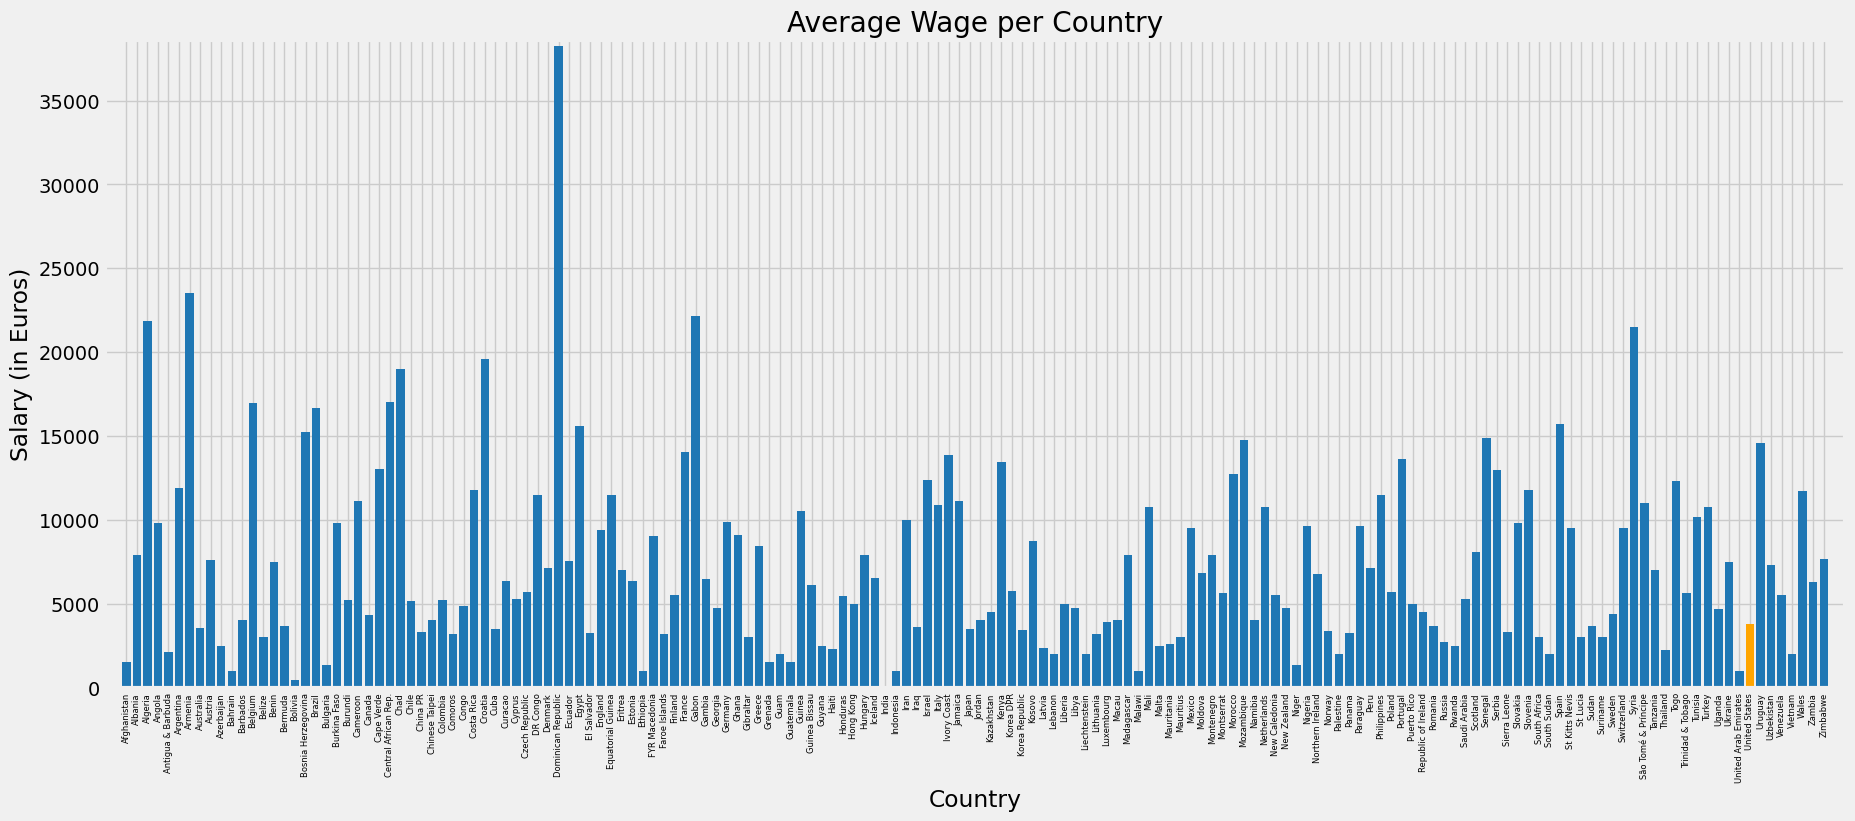

In [193]:
plt.figure(figsize = (20,8))

colors = [ 'tab:blue' if name != "United States" else 'orange' for name in names ]
plt.bar(np.arange(len(wageavgs['Country'])), wageavgs['Average Wage'], color=colors)
plt.xticks(np.arange(len(wageavgs['Country'])), wageavgs['Country'], rotation='vertical')
plt.margins(0.01)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.xlabel("Country")
plt.ylabel("Salary (in Euros)")
plt.title("Average Wage per Country")

plt.show()


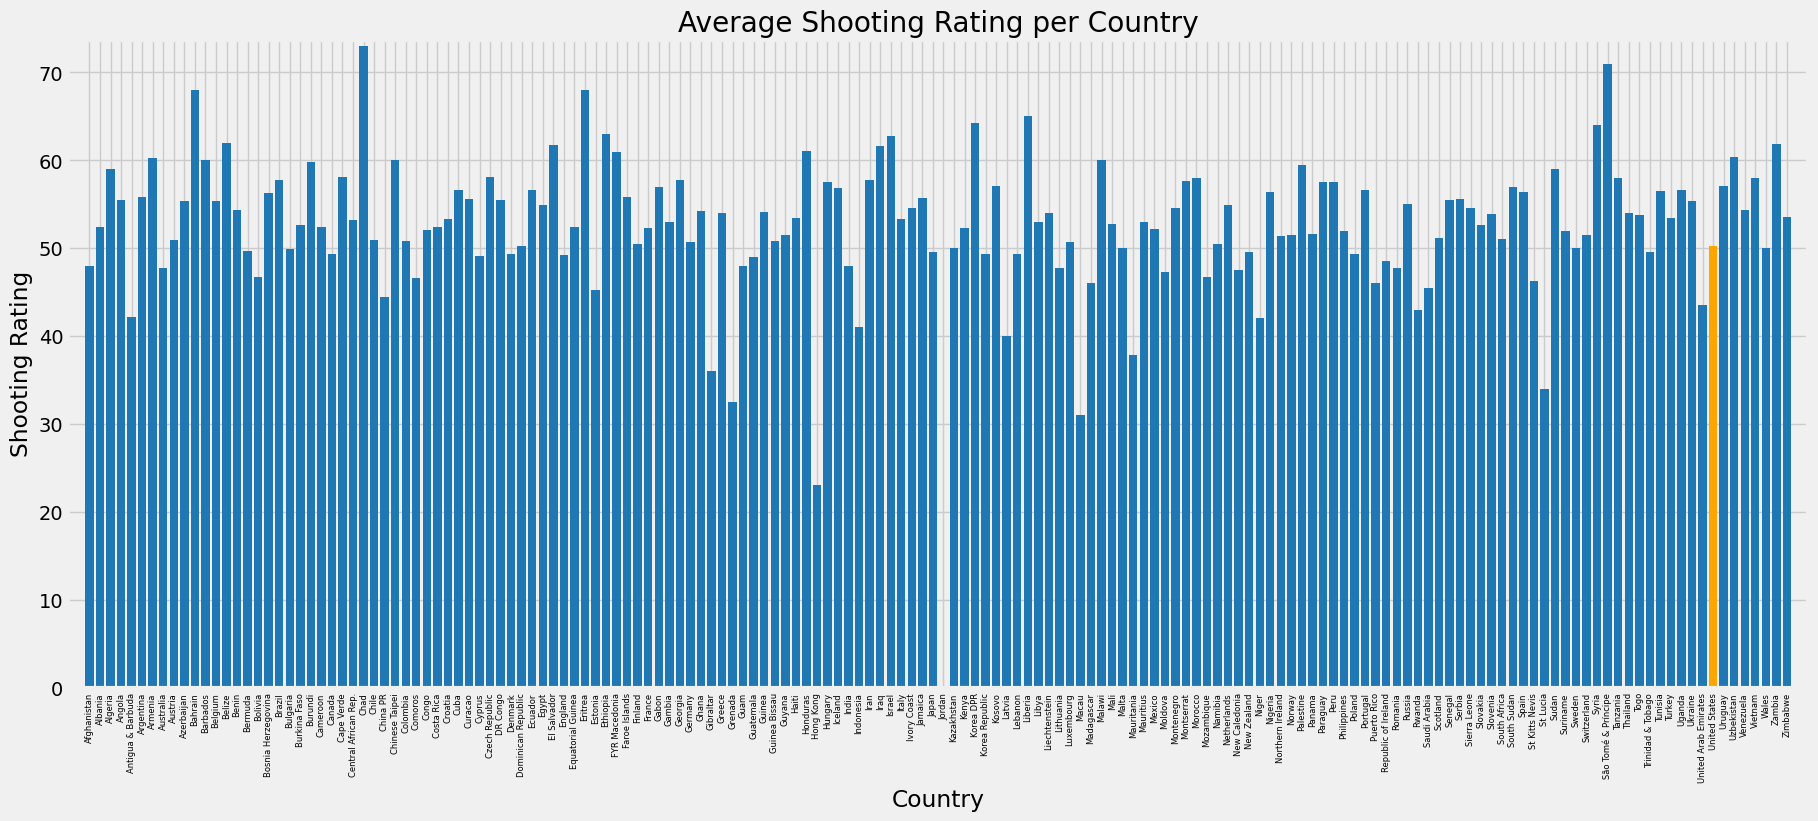

In [194]:
plt.figure(figsize = (20,8))
plt.bar(np.arange(len(shootavgs['Country'])), shootavgs['Shooting'], color=colors)
plt.xticks(np.arange(len(shootavgs['Country'])), shootavgs['Country'], rotation='vertical')
plt.margins(0.01)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.xlabel("Country")
plt.ylabel("Shooting Rating")
plt.title("Average Shooting Rating per Country")

plt.show()

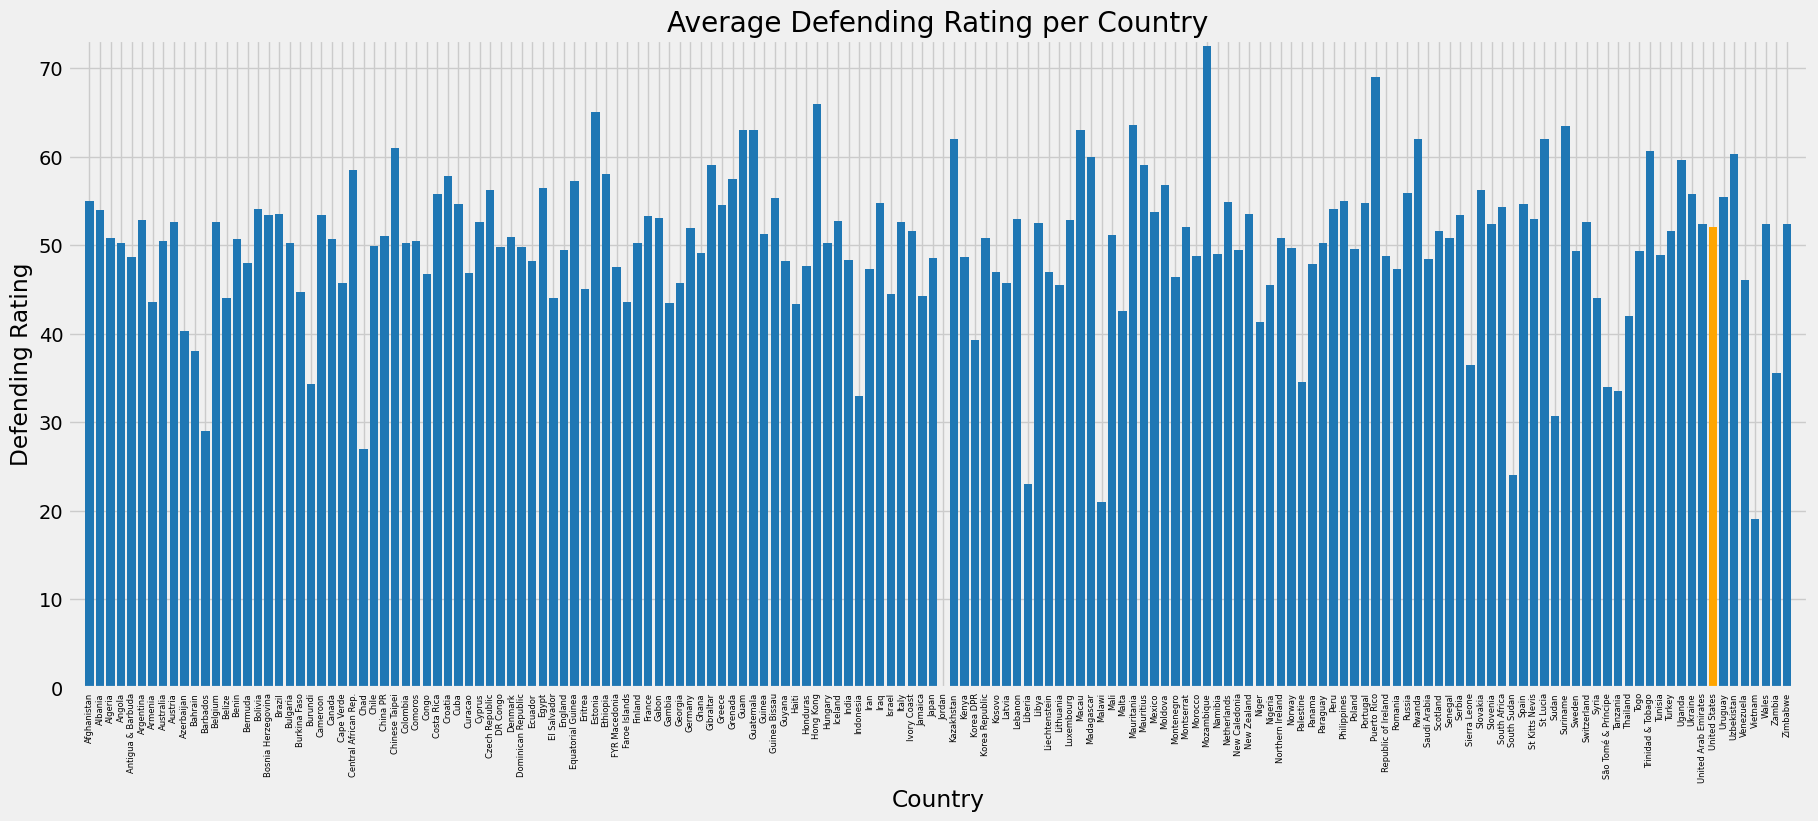

In [195]:
plt.figure(figsize = (20,8))
plt.bar(np.arange(len(defendavgs['Country'])), defendavgs['Defending'], color=colors)
plt.xticks(np.arange(len(defendavgs['Country'])), defendavgs['Country'], rotation='vertical')
plt.margins(0.01)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.xlabel("Country")
plt.ylabel("Defending Rating")
plt.title("Average Defending Rating per Country")

plt.show()

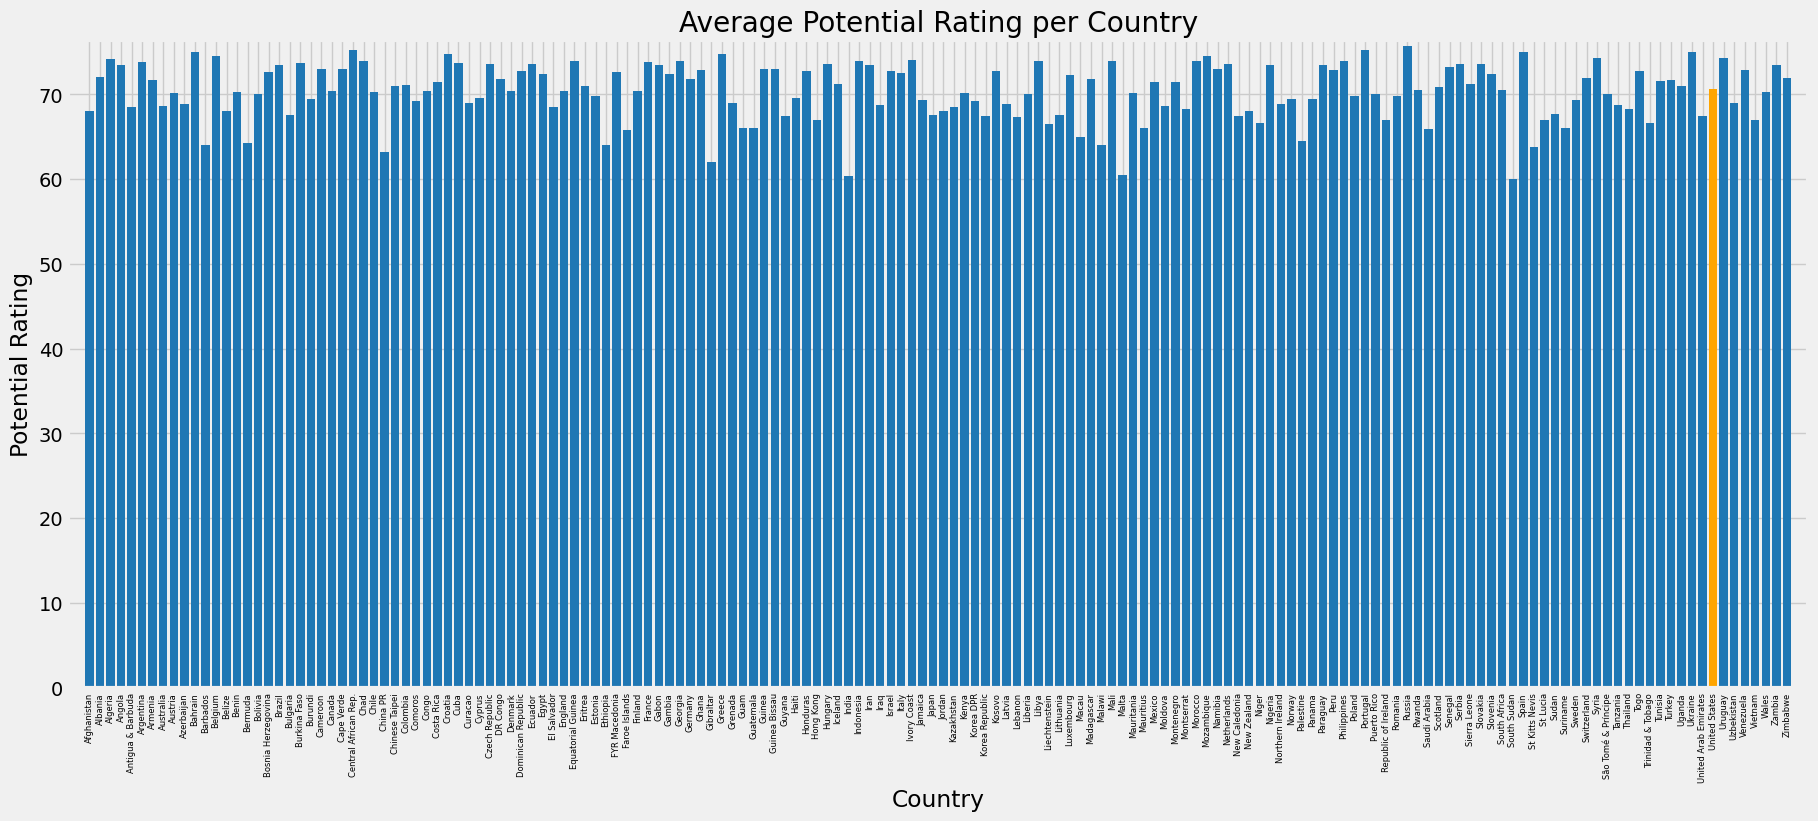

In [196]:
plt.figure(figsize = (20,8))
plt.bar(np.arange(len(potentialavgs['Country'])), potentialavgs['Potential'], color=colors)
plt.xticks(np.arange(len(potentialavgs['Country'])), potentialavgs['Country'], rotation='vertical')
plt.margins(0.01)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.xlabel("Country")
plt.ylabel("Potential Rating")
plt.title("Average Potential Rating per Country")

plt.show()

Visually, we can see that the United States is fairly average, if not below average in these areas. We can further confirm by seeing where it falls on a bell curve per category:

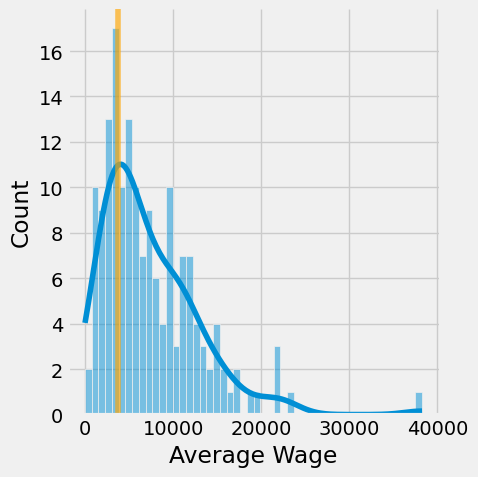

In [197]:
sns.displot(wageavgs['Average Wage'], bins=50, kde=True)
plt.axvline(x = wageavgs.at[154, 'Average Wage'], color = 'orange', label = 'US Average', alpha=0.65)

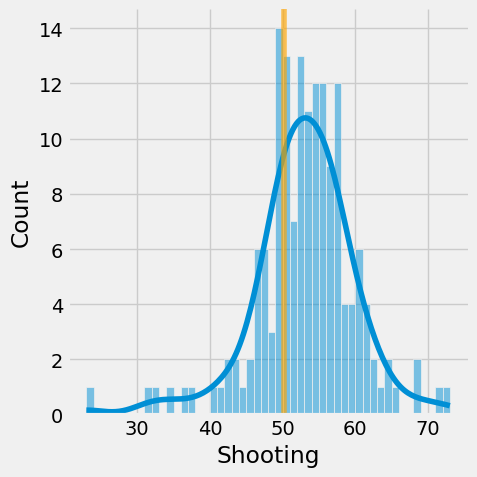

In [198]:
sns.displot(shootavgs['Shooting'], bins=50, kde=True)
plt.axvline(x = shootavgs.at[154, 'Shooting'], color = 'orange', label = 'US Average', alpha=0.65)

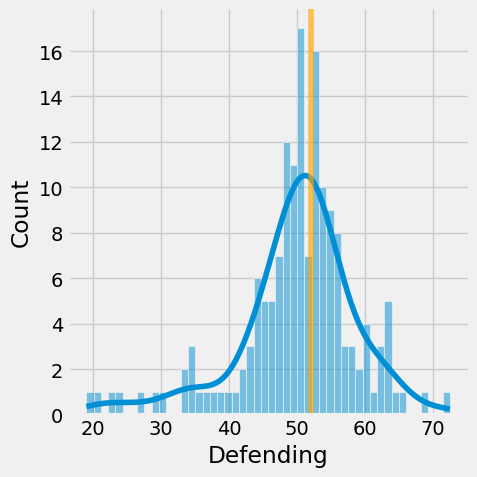

In [199]:
sns.displot(defendavgs['Defending'], bins=50, kde=True)
plt.axvline(x = defendavgs.at[154, 'Defending'], color = 'orange', label = 'US Average', alpha=0.65)

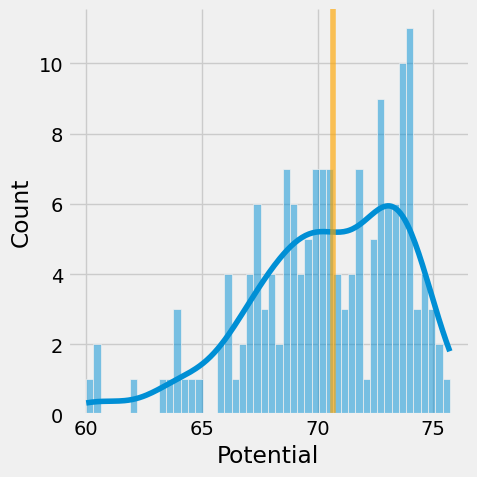

In [200]:
sns.displot(potentialavgs['Potential'], bins=50, kde=True)
plt.axvline(x = potentialavgs.at[154, 'Potential'], color = 'orange', label = 'US Average', alpha=0.65)

Where in all cases, the orange bar represents America's position.

As we can see, America does, indeed, fall remarkably average with regards to these four statistics, if not below average.

# FURTHER ANALYSIS

The one thing I found the most interesting was how well the Dominican Republic pays its players. From the Average Wage per Country graph, we can see it claims the highest pay over any other country by a remarkably wide margin.

In [201]:
dominicanplayers = fifa_df.loc[fifa_df['nationality'] == "Dominican Republic"]
dominicanplayers

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
636,221639,https://sofifa.com/player/221639/mariano-diaz-...,Mariano,Mariano Díaz Mejía,25,1993-08-01,180,76,Dominican Republic,Real Madrid,...,58+2,58+2,58+2,58+2,58+2,57+2,58+2,58+2,58+2,57+2
7137,198579,https://sofifa.com/player/198579/cayetano-bonn...,Tano Bonnin,Cayetano Bartolomé Bonnín Vásquez,29,1990-06-30,186,76,Dominican Republic,UD Almería,...,60+2,63+2,63+2,63+2,60+2,61+2,66+2,66+2,66+2,61+2
12692,251975,https://sofifa.com/player/251975/carlos-julio-...,C. Martínez,Carlos Julio Martínez,25,1994-02-04,174,71,Dominican Republic,CD Mirandés,...,60+2,58+2,58+2,58+2,60+2,61+2,61+2,61+2,61+2,61+2
14844,244048,https://sofifa.com/player/244048/luis-coordes/...,L. Coordes,Luis Coordes,20,1999-01-02,180,74,Dominican Republic,FC St. Pauli,...,44+2,39+2,39+2,39+2,44+2,41+2,33+2,33+2,33+2,41+2


Here, we can see that a potential reason for this is the fact that only four players are accounted for.

I decided to look further into this and compare player count by country to average wage by country, since I had already made dataframes for both:

In [202]:
playersvswage = countries.merge(wageavgs, how='right')
playersvswage


,Country,Players,Average Wage
0,Afghanistan,2,1500.00
1,Albania,43,7930.23
2,Algeria,50,21840.00
3,Angola,16,9812.50
4,Antigua & Barbuda,7,2142.86
...,...,...,...
157,Venezuela,66,5530.30
158,Vietnam,1,2000.00
159,Wales,117,11700.85
160,Zambia,10,6300.00


Now we compare them:

<Axes: xlabel='Players', ylabel='Average Wage'>

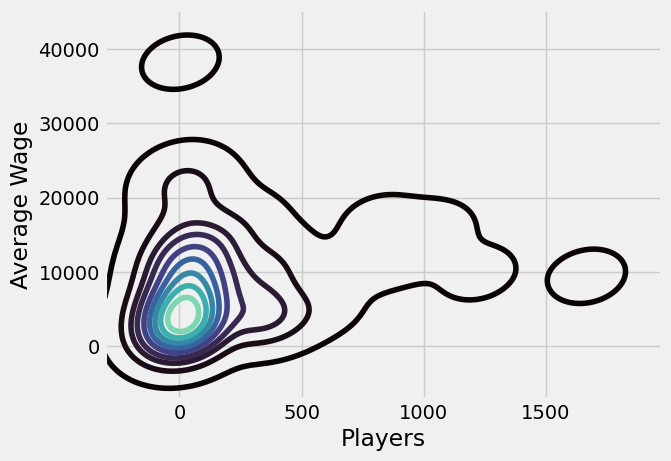

In [203]:
sns.kdeplot(data=playersvswage, x= 'Players', y='Average Wage', levels = 10, thresh=0.01, cmap="mako")

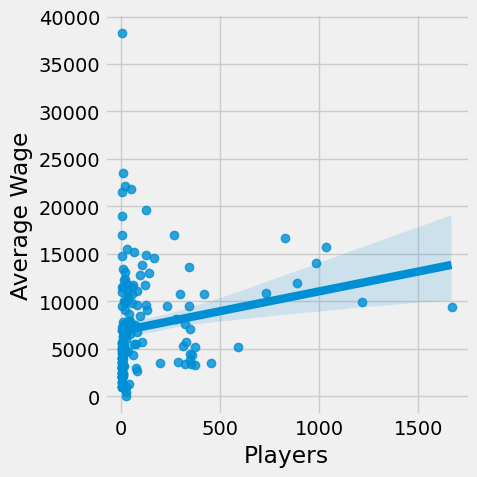

In [204]:
sns.lmplot(data=playersvswage, x= 'Players', y='Average Wage')

Here, we see that generally speaking, while our datapoints are very widely spread out, countries pay their players less when there are less of them, and more if there are more of them, proving the Dominican Republic's team to be outliers.